# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [3]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

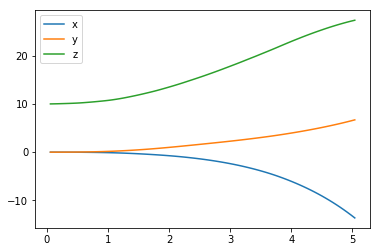

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

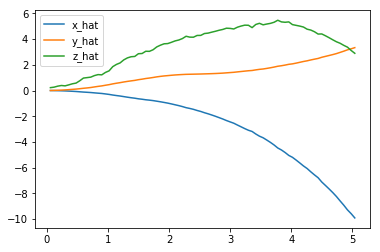

In [5]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

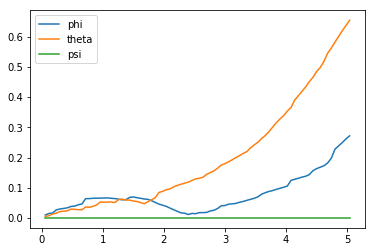

In [6]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

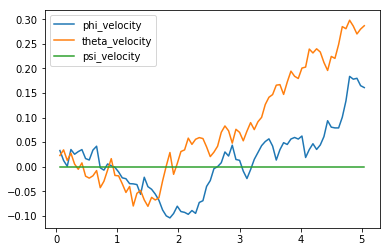

In [7]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

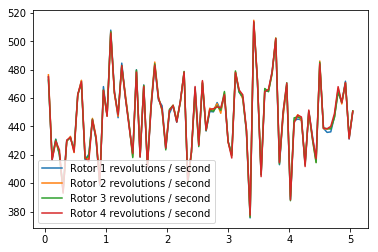

In [8]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-13.64129317   6.69805039  27.36275608   0.2718352    0.65474449   0.        ]
[-9.9077871   3.33515036  2.89513621]
[ 0.16090223  0.28676505  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.178 (best =   0.111), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

Episode =  500, total_reward = 4852.650

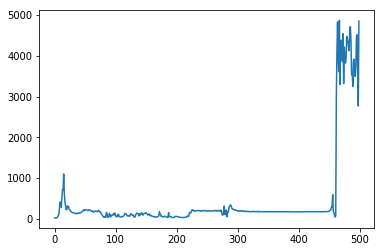

In [12]:
## TODO: Train your agent here.
import sys
import pandas as pd
import pylab as plt
from agents.agent import DDPG
from mytask import Task

num_episodes = 500
target_pos = np.array([0, 0, 1])
task = Task(target_pos=target_pos)
agent = DDPG(task) 

score = []
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            score.append(agent.total_reward)
            print("\rEpisode = {:4d}, total_reward = {:7.3f}".format(i_episode, agent.total_reward), end="")
            break
    sys.stdout.flush()
    
plt.plot(score)
plt.show()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

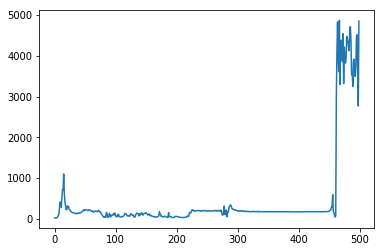

In [13]:
## TODO: Plot the rewards.
plt.plot(score)
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

I tried to keep it as simple as possible, to try and understand what was happening:
 - The task itself is simply "move up by one unit"
 - My initial reward function was simply one divided by the absolute value of the difference between the agent's location and the target's position at the end of each episode. With this reward function, the higher the distance, the lower the reward and vice versa, with an increasing bonus as the agent gets closer to the target and an increasing penalty as it gets farther away.
 - After multiple tries with that reward function (and tweaky my agent at the same time) without getting results, I added one last tweak by using the **square** of the absolute distance as my denominator. The idea was to magnify the reward/penalty. It worked much better so I kept it.
 - It got me to a point where, if my maths is correct, the agent learned to complete the task with ~98.5% accuracy. That seems acceptable, albeit for a simple task

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I used the template agent that was provided (based on the DDPG paper) and tried to "dissect" it by playing with the different parameters. But before I discuss that, let me explain my understanding of how that agent works:
- The agent is an application of the "actor-critic" algorithm, whereby an "actor" learning algorithm (based on Policy) and a "critic" learning algorithm (based on Value) interact with and learn from each other. In practice, the "critic" algorithm gives feedback to the "actor" one and helps it learn from its environment (and from the rewards).
- The role of the critic is basically to evaluate the different options. It will take as an input an environment state and an action, will evaluate how good the action is given the state and return a score for that action
- The actor then decides what to do. It will take an environment state as input and will return an action
- The advantage of this method, especially with continuous task, is that the critic algorithm enables the actor to learn better and better over time.
- The actual DDPG implementation of this algorithm adds two wrinkles to it (from the original DDPG paper): (1) it adds a replay buffer, which allows to train the agent on independent samples, and (2) the agent is trained using a target Q-network.
- The neural network used on the actor side has 5 layers (1 input, 3 hidden, 1 output). The hidden layers have respectively 16, 32 and 16 units. I discuss the activation functions below.
- The neural network on the critic side has 7 layers (2 inputs, 4 hidden with 16, 32, 16 and 32 units, respectively, 1 output). I discuss the activation functions below.

Based on the template agent that was provided, I started experimenting with the following:
- activation functions of the layers in the deep neural network used to train the actor. The template provided was using ReLU  for the hidden layers and a linear function for the output; it gave poor results overall, no matter what task or reward function I was using so I changed those functions to sigmoid (both on the hidden input layers and the output layer) and it worked better. I seem to remember from the "Deep Learning" module of this nanodegree that Sigmoid functions work well with deterministic gradients, which is what DDPG uses, so that results makes sense.
- ditto for the critic. The default settings (ReLU for input layers, linear for the activation layer) weren't giving good results; a sigmoid function across the boards worked much better.
- the batch size of the buffer replay (set at 64 in the template provided). I tried going from 8 all the way to 128 but couldn't see any major improvement either way so I left it at 64. My initial intuition was to actually reduce it and get closer to a DQN but it didn't work out.
- the learning parameters (gamma and tau). For gamma, I went all the way down to 0.8; it actually made the results a lot worse (which makes sense in hindsight, given that we are dealing with a continuous task) so I reverted back to 0.99. I experimented a little with tau as well (all the way up to 0.1) but reverted to 0.01 because of lack of good results.
- the noise parameters (mu, theta and gamma). My intuition was that the model was highly sensitive to these parameters and it proved correct. I tried high values (all the way to 5 for each one of them) and I could see the noise in the results going way up; at 0.01, there was virtually no noise...but no learning either (the rewards plot was just a flat line). I settled on values of 0.1 for each parameter, which gave me good results.



**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

- It looks like it was a hard task to learn, based on the rewards plot. At first, and for several hundred episodes, it looked like the agent wasn't making any progress
- It wasn't gradual learning. for over 400 episodes, there was basically no progress. Then the agent seems to have learned something and maintained that behavior for the remaining episodes
- The rewards over the last ~50 episodes were oscillating between 4000 and 5000 which, based on the definition of my reward function, suggests an average distance of 0.014-0.015 (or an error of 1.4-1.5%). That seems like a good performance, even though the task was admittedly simple.

I should mention here that this was the "best" of many attempts. Overall, I would say that I tried close to 100 different configurations, by tweaking:

(1) the reward function: I tried a linear one (unweighted, then weighted), an inverse one and settled for the inverse of the squared distance; I tried that last reward function about a dozen time with different parameters on the agent side and it seemed to give better results overall so I kept it

(2) the agent's hyperparameters, and especially the noise function. I played with gamma and tau but very quickly settled on a high gamma (0.99) and a low tau (0.01). Then I focused on the three parameters of the noise function (mu, theta, sigma). I tried high values (higher than 1, as high as 5) and small ones (as low as 0.01 for each one) in order to get a sense of that was impacting the learning algorithm. I settled on fairly low values (0.1 each), which gave good results. I am assuming that this is because the task is fairly simple and not too much noise is needed for learning to happen; with a more complex task, one may want to use higher values for these parameters

(3) the activation functions of the hidden layers of the deep neural networks, both on the actor and on the critic side. Here again, I experimented with various options. ReLU wasn't giving good results at all. I got much better results with a Sigmoid function across the board so I kept it.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

It was hard! This project was by far the hardest of the nanodegree. The hardest part of the project itself was to get the agent to "learn". It took me many attempts to figure out the subtle balance between the task, reward and agent. 

In the end, I realized that the agent that I used (based on the DDPG template that was provided) was most sensitive to the activation functions of the underlying deep neural networks. The template used the ReLU function for the hidden layers, which was not working very well. I changed it to Sigmoid and it worked much better. It makes sense to me, given the problem at hand: ReLU is great when the problem is binary but, here, we are dealing with a continuous type of problem.

What I find the most interesting is how difficult it is for the agent to learn. Based on how humans learn, you would expect the agent to accumulate experience and the reward to keep going up after a few attempts, especially with a simple task like the one I used. But that is not the case and you can see the reward going down sometimes, especially if you look at it on an episode-over-episode basis.